# RDD Project

**Group 3**

Members:
- Ankit Kaushal
- Ivan Jordaan
- Lesley Borowski
- Shane Dam
- Wilson Tjendana

In [319]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [320]:
#cleaning up & transforming dataset
df = pd.read_csv(r'../resources/Covid_data.csv')
df = df.dropna()
df['Date de déclaration du cas'] = pd.to_datetime(df['Date de déclaration du cas'])
df.columns = ['Date_case','Epidemiological_link','In_lab','Moving_avg_7days']
df

,Date_case,Epidemiological_link,In_lab,Moving_avg_7days
0,2020-02-24,0,0,0.14
1,2020-02-25,0,1,0.29
2,2020-02-26,0,0,0.29
3,2020-02-27,0,0,0.43
4,2020-02-28,0,1,0.86
...,...,...,...,...
597,2021-10-13,1,616,561.57
598,2021-10-14,0,708,551.86
599,2021-10-15,1,688,544.57
600,2021-10-16,1,477,526.14


In [321]:
#split dataset into different dataframes for each events
df['daynumber'] = df.index
df['daynumber'] = df['daynumber'].astype(int)

mar_20th_df = df.loc[(df['Date_case']<="2020-04-10") & (df['Date_case']>="2020-02-27")]

aug_31_df = df.loc[(df['Date_case'] <= "2020-09-21") & (df['Date_case'] >= "2020-08-10")]

dec_25_df = df.loc[(df['Date_case'] <= "2021-01-15") & (df['Date_case'] >= "2020-12-04")] 

In [322]:
### Functions for evaluating linear vs. quadratic models ### 

#given a threshold value, add column for variable 'threshold' to 'df'
def threshold(df,n):
    df = df.assign(threshold = df['daynumber'] > n)
    return df

#making new dataframe 'x' which will have every elements needed for modeling; i.e. a constant, 'x' values, squared 'x'
 #values (squared feature), 'y' (response variable) and 'c' (threshold variable)
def new_x(df):
    x = pd.DataFrame(df['daynumber'])
    x_squared = np.square(df['daynumber'])
    x = pd.concat((x, x_squared),axis = 1)
    x = sm.add_constant(x)
    x.columns = ['const','daynumber','daynumber_sq']
    x = pd.concat((x,df['Date_case'], df['Moving_avg_7days'],df['threshold']),axis = 1)
    return x

#ols linear regression modeling
def ols_lin_reg(df):
    model = smf.ols("Moving_avg_7days~daynumber*threshold", df).fit()
    print(model.summary())

#ols quadratic regression modeling
def ols_quad_reg(df):
    model = smf.ols("Moving_avg_7days~daynumber*threshold+daynumber_sq*threshold", df).fit()
    print(model.summary())

In [323]:
#applying threshold function to the different dataframes of every events
mar_20th_df = threshold(mar_20th_df,25)
aug_31_df = threshold(aug_31_df,189)
dec_25_df = threshold(dec_25_df,305)
#25, 189, 305 are the indexes of the cutoff event days

#creating new dataframes which will contain the important elements
x = new_x(mar_20th_df)
x1 = new_x(aug_31_df)
x2 = new_x(dec_25_df)

In [324]:
#comparing march 20th lockdown ols regression results

#ols_lin_reg(x)
ols_quad_reg(x)

                            OLS Regression Results                            
Dep. Variable:       Moving_avg_7days   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1149.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           2.33e-40
Time:                        19:29:49   Log-Likelihood:                -204.17
No. Observations:                  44   AIC:                             420.3
Df Residuals:                      38   BIC:                             431.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [325]:
#comparing august 31 school reoppening ols regression results

#ols_lin_reg(x1)
ols_quad_reg(x1)

                            OLS Regression Results                            
Dep. Variable:       Moving_avg_7days   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1871.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           2.14e-43
Time:                        19:29:50   Log-Likelihood:                -150.85
No. Observations:                  43   AIC:                             313.7
Df Residuals:                      37   BIC:                             324.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [326]:
#comparing december 25th lockdown ols regression results

#ols_lin_reg(x2)
ols_quad_reg(x2)

                            OLS Regression Results                            
Dep. Variable:       Moving_avg_7days   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     641.0
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           7.48e-35
Time:                        19:29:50   Log-Likelihood:                -211.32
No. Observations:                  43   AIC:                             434.6
Df Residuals:                      37   BIC:                             445.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [355]:
### Breaking the dataframe into 21day periods

after_mar_20th_df = df.loc[(df['Date_case'] <= "2020-04-10") & (df['Date_case'] > "2020-03-20")]

before_mar_20th_df = df.loc[(df['Date_case'] >= "2020-02-27") & (df['Date_case'] < "2020-03-20")]

after_aug_31_df = df.loc[(df['Date_case'] <= "2020-09-21") & (df['Date_case'] > "2020-08-31")]

before_aug_31_df  = df.loc[(df['Date_case'] >= "2020-08-10") & (df['Date_case'] < "2020-08-31")]

after_dec_25_df = df.loc[(df['Date_case'] <= "2021-01-15") & (df['Date_case'] > "2020-12-25")]

before_dec_25_df = df.loc[(df['Date_case'] >= "2020-12-04") & (df['Date_case'] < "2020-12-25")]

In [356]:
### A function that returns both linear and qudratic fitting based on the third argument

def linreg(before, after, title, n):
    
    # Initializes the x-variables and creates the plot
    fig, ax = plt.subplots()
    x1 = sm.add_constant(np.array(before['daynumber'])[:,np.newaxis])
    x2 = sm.add_constant(np.array(after['daynumber'])[:,np.newaxis])
    y1 = before['Moving_avg_7days']
    y2 = after['Moving_avg_7days']
    
    #adding squared feature
    x1_squared = np.square(x1[:,1])[:,np.newaxis]
    x1 = np.concatenate((x1,x1_squared),axis = 1)
    x2_squared = np.square(x2[:,1])[:,np.newaxis]
    x2 = np.concatenate((x2,x2_squared),axis = 1)
    plt.title('RDD quadratic fit case of ' + title, fontdict = {'fontsize': 14, 'fontweight': 'bold'})
    
    #Does the OLS fits with HC2
    model = sm.OLS(y1,x1).fit(cov_type='HC2')
    est = sm.OLS(y2,x2).fit(cov_type='HC2')


    #plots the scatter and fitted curve
    ax.scatter(x1[:,1],y1)
    ax.scatter(x2[:,1],y2)
    ax.plot(x1[:,1],model.predict(x1),color = 'magenta')
    ax.plot(x2[:,1],est.predict(x2),color = 'cyan')
    
    #plot settings
    plt.xlabel('Days')
    plt.ylabel('Moving average ( 7 days )')
    plt.axvline(n,c = 'black', linestyle = '--')
    ax.legend(['Before event','After event','Event day'])

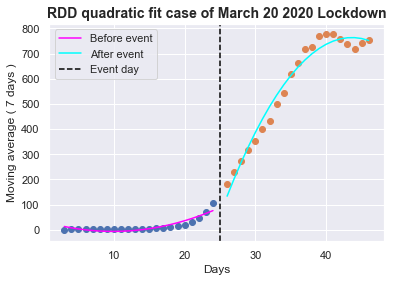

In [357]:
linreg(before_mar_20th_df, after_mar_20th_df,'March 20 2020 Lockdown',25)

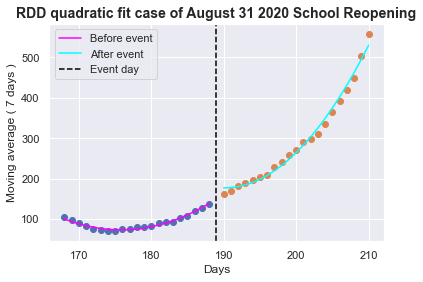

In [358]:
linreg(before_aug_31_df, after_aug_31_df, 'August 31 2020 School Reopening',189)

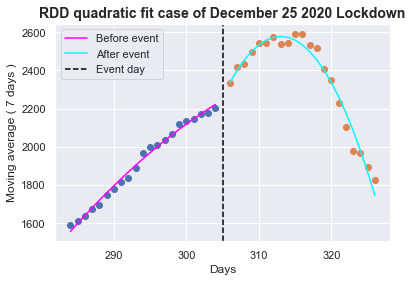

In [359]:
linreg(before_dec_25_df, after_dec_25_df, 'December 25 2020 Lockdown',305)

# Interpretation of results

**Interpretation of the p-value on the effect of the measure taken**

- All of our cutoff parameters have p-values below 0.05, which means that we reject the assumption/null hypothesis that our cutoff has no effect on our response variable. In other words, we can assume that our cutoff parameters are statistically significant and the enforced measures had an effect on average weekly COVID cases.


**Justification of regression design**

- The amount of time included on both sides of the cutoff (longer is not necessarily better)
     - We chose to include 21 days before and 21 days after our cutoff, as we felt that as COVID has an incubation period of 14 days, 1.5 incubation periods would be enough to properly show trends and account for the number of active cases, while keeping in mind that smaller sample sizes show more distinguishable results.
- The polynomial degree (higher is not always better)
     - The estimators for causal effects based on higher order polynomials can be misleading, and we recommend not use them. Instead, use estimators based on linear or quadratic polynomials. Moreover, any higher degree of polynomial would risk us overfitting our model.
     - We chose a polynomial degree of 2, as we saw that it consistently increased our r-squared values and reduced our AIC and BICs in comparison to linear models. 
- Other regression design considerations
     - Before landing on our current model, we considered using linear and quadratic regression on two different datasets. Dataset 1 was populated with data from before the cutoff event and Dataset 2 was populated with data from after to compare their OLS results in order to choose the best model. However, NaN values were generated which are worthless for the interpretation of the results. Therefore, that design was dismissed.


**Explanation of the findings for the events**

- All three of our models have very high r-squared values, over .95, which tells us that over 95% of our data fit our models and as a result, our models have very strong predictive power.
- March 20th Regression
    - We can see that our cutoff, or threshold, has a large negative coefficient, meaning that the implementation of the lockdown significantly decreases the slope of the number of rolling average cases. Put plainly, the lockdown led to the number of COVID cases trending downwards We can see this reflected in our graph, where average cases initially increase after our cutoff point due to the exponential spread of COVID, but sharply decrease after the first 14-day incubation cycle, ultimately creating a negative curve.
- August 31st Regression
    - In contrast, our cutoff for the school reopening has a positive coefficient, meaning that schools reopening increased the moving daily average of COVID cases. Our coefficient of 1.86e+04 tells us that schools reopening increased the slope of our rolling average of cases by at least 1.86e+04. This is consistent with what our graph shows: our curve fitting the data points after our cutoff has a much steeper upward curve than the one fitting the data points before the cutoff.
- December 25th Regression
    - The Christmas day lockdown also has a negative coefficient, meaning that the event resulted in weekly rolling average cases sloping downwards. This is consistent with our first example, where the implementation of a lockdown results in a downward trend in COVID cases.
- Ultimately our models show that with high statistical significance, we can assume that tightening COVID restrictions reduces the number of COVID cases and loosening restrictions increases the number of cases.
 
